# Create an analysis of CPI (Consumer Price Index) and Stock Market Performancre
## Time Period: Last midterm elections in the United States

In this analysis, we delve into the Consumer Price Index (CPI) and its correlation with stock market performance during the last five midterm elections in the United States, 12 months before and after.

### 1. Stock Selection and Data Collection

To assess the impact of CPI on the stock market, we selected three stocks from the top six industries, focusing on those with at least one year's worth of historic prices. The chosen stocks represent diverse sectors to capture a broad market view. We gathered closing prices and dates for each stock to form a comprehensive dataset.

### 2. Portfolio Returns Calculation

We calculated the weighted returns for the portfolio, assuming an equal number of shares for each selected stock. This approach ensures a balanced representation of the chosen industries within the portfolio.

### 3. Integration with Portfolio Returns Dataset

The portfolio returns were joined with the dataset containing returns for all portfolios under consideration. This integration allows for a comparative analysis, assessing how our portfolio performs relative to others.

### 4. Performance and Risk Analysis

The performance and risk analysis was re-run, incorporating our portfolio to evaluate its performance against others. This step provides insights into how our selected stocks contribute to the overall portfolio dynamics.

### 5. Correlation Analysis

To gain a deeper understanding of the relationships between individual stocks, we conducted correlation analysis. This step helps identify any significant correlations among the selected stocks, providing insights into potential dependencies and risks within the portfolio.

By undertaking these steps, we aim to uncover patterns and trends in both CPI and stock market performance during the specified midterm election periods, shedding light on the interconnectedness of economic indicators and financial markets.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

In [2]:
# Set csv paths 

CPI_data = Path('cpi_data.csv')


## Data Cleaning ##

In [3]:
# Reading CPI data

CPI_data= Path('cpi_data.csv')
CPI_df = pd.read_csv(CPI_data, index_col='Date', parse_dates=True)
CPI_df.head()


/var/folders/72/jrk85kms6q7_78yj5r80dnkw0000gn/T/ipykernel_6077/3622626964.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CPI_df = pd.read_csv(CPI_data, index_col='Date', parse_dates=True)


,Year,Period,Label,Observation Value,1-Month % Change
Date,,,,,
2013-01-01,2013,M01,2013 Jan,230.280,0.3
2013-02-01,2013,M02,2013 Feb,232.166,0.8
2013-03-01,2013,M03,2013 Mar,232.773,0.3
2013-04-01,2013,M04,2013 Apr,232.531,-0.1
2013-05-01,2013,M05,2013 May,232.945,0.2


In [4]:
# Count nulls

CPI_df.isnull().sum ()

Year                 0
Period               0
Label                0
Observation Value    0
1-Month % Change     0
dtype: int64

## Conduct Quantitative Analysis

### Performance Analysis


###  Plot the Consumer Price Index (CPI) for each month over the past decade

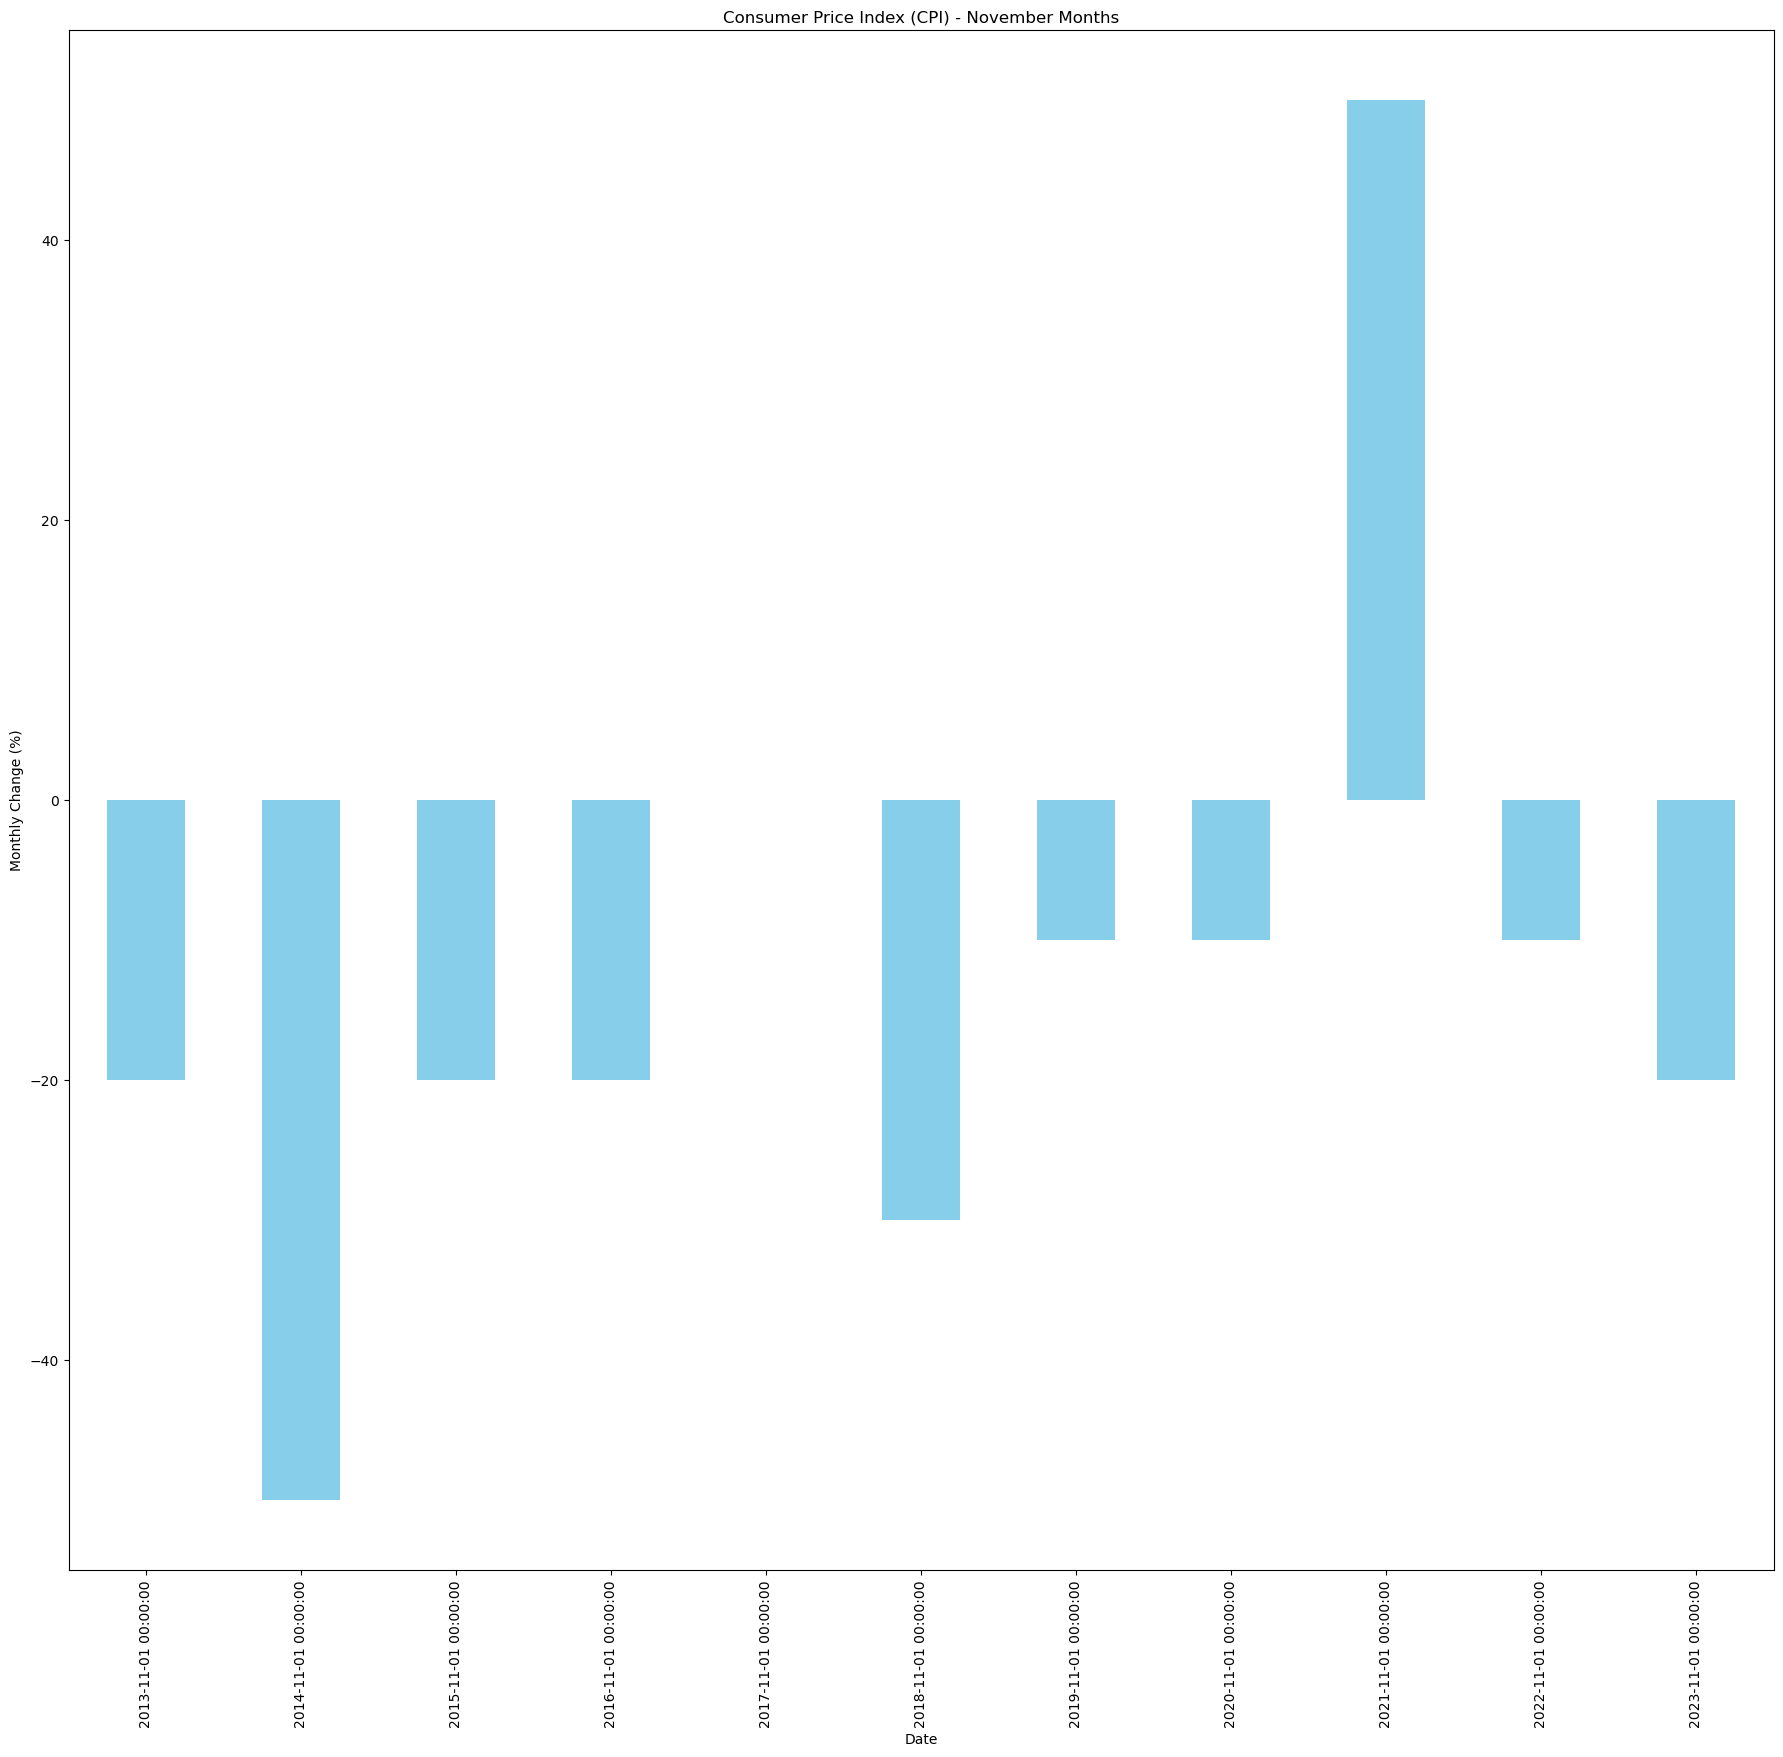

In [5]:
# Convert 'Date' index to datetime
CPI_df.index = pd.to_datetime(CPI_df.index)

# Convert '1-Month % Change' to percentage
CPI_df['1-Month % Change'] *= 100

# Filter data for November months
november_df = CPI_df[CPI_df.index.month == 11]

# Plotting for November months
november_df.plot(kind='bar', y='1-Month % Change', figsize=(22, 20), legend=None, color='skyblue', title='Consumer Price Index (CPI) - November Months')
plt.xlabel('Date')
plt.ylabel('Monthly Change (%)')
plt.show()

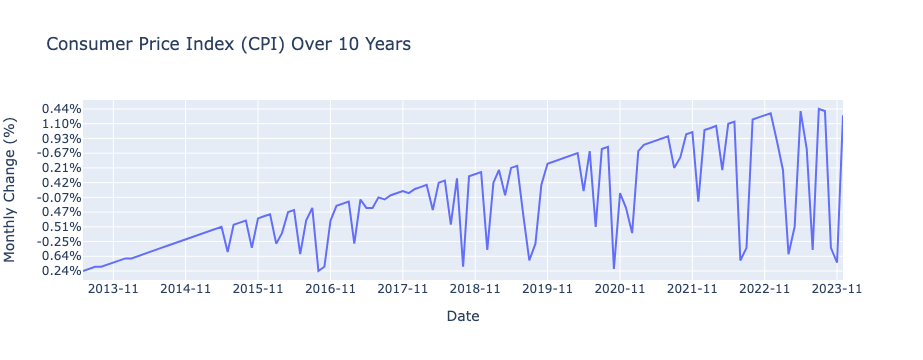

In [17]:
import pandas as pd
import plotly.graph_objects as go

# Assuming CPI_df is your DataFrame
# If not, replace CPI_df with your actual DataFrame name

# Convert 'Date' index to datetime
CPI_df.index = pd.to_datetime(CPI_df.index)

# Calculate '1-Month % Change' using pct_change() method
CPI_df['1-Month % Change'] = CPI_df['Observation Value'].pct_change() * 100

# Drop the first row since the percentage change is undefined for it
CPI_df = CPI_df.dropna()

# Convert '1-Month % Change' to strings with a percentage sign
CPI_df['1-Month % Change'] = CPI_df['1-Month % Change'].map(lambda x: f'{x:.2f}%')

# Create an interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=CPI_df.index, y=CPI_df['1-Month % Change'], mode='lines', name='Monthly Change (%)'))

fig.update_layout(title='Consumer Price Index (CPI) Over 10 Years', xaxis_title='Date', yaxis_title='Monthly Change (%)')

# Set y-axis tick format to display as percentage
fig.update_yaxes(tickformat='%{text:.2f}%')

# Set x-axis ticks to show every November for each year
november_ticks = CPI_df[CPI_df.index.month == 11].index
fig.update_xaxes(
    tickvals=november_ticks,
    ticktext=november_ticks.strftime('%Y-%m'),  # Format as year-month
)

# Show the plot
fig.show()


